### Modelling

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Additional Imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
### Fixed Variables ###
randstate = 91

In [4]:
# Load in CSV and preview
hoteldf = pd.read_csv("HR_EDA.csv", index_col=0)
hoteldf.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_State,Review_Year,Review_Month
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,2017,8
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,2017,8
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands,2017,7
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands,2017,7
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands,2017,7


### NLP Section

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ["hotel", "hotels", "everything", "could", "would", "the", "and", "were", "are", "is", "was", "a", "very", "positive", "negative"]  # to add on more stopwords

In [6]:
# Top Positive Comments
hoteldf[(hoteldf["Average_Score"] >= 8.8) & (hoteldf["Positive_Review"] != "No Positive")]["Positive_Review"]

971        They have followed through special requests C...
972        Great location and very comfortable rooms Roo...
973        We had the most basic room which was great va...
974        Standard rooms are very comfortable Good cent...
975        Very large room Hidden courtyard view with ba...
976                             Location and room excellent
977        Guest svc manager Francesco was very helpful ...
978          Room was great Bathroom was immaculately clean
979        Room and bathroom excellent Really comfortabl...
980        Staff really friendly bed was extremely comfy...
981        we were very pleased with the Hotel and were ...
982        Room was clean and well appointed Location wa...
983        Nice room Modern and cool Bar space in lobby ...
984        Being new in this area the conceierge service...
985        Brilliant location so close to the tube Room ...
986        Nice room nice presentation of hotel receptio...
987        The location was excellent an

In [7]:
# Declaring those with scores more than 8.8 as Positive Reviews
X = hoteldf[(hoteldf["Average_Score"] >= 8.8) & (hoteldf["Positive_Review"] != "No Positive")]["Positive_Review"]
y = hoteldf[(hoteldf["Average_Score"] >= 8.8) & (hoteldf["Positive_Review"] != "No Positive")]["Reviewer_Score"]

In [8]:
cvec = CountVectorizer(stop_words = stop, lowercase=True)
X1 = cvec.fit_transform(X)
sum_words = X1.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [9]:
genposcount = pd.DataFrame(words_freq, columns=["word", "count"]).head(10)

In [10]:
# Declaring that those below 8.1 have negative reviews.
X = hoteldf[(hoteldf["Average_Score"] <= 8.1) & (hoteldf["Negative_Review"] != "No Negative")]["Negative_Review"]
y = hoteldf[(hoteldf["Average_Score"] <= 8.1) & (hoteldf["Negative_Review"] != "No Negative")]["Reviewer_Score"]

In [11]:
cvec = CountVectorizer(stop_words = stop, lowercase=True)
X1 = cvec.fit_transform(X)
sum_words = X1.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [12]:
gennegcount = pd.DataFrame(words_freq, columns=["word", "count"]).head(10)

In [13]:
pd.concat([genposcount, gennegcount], axis=1)

,word,count,word,count
0,staff,63741,room,70579
1,location,49651,small,21697
2,room,41962,breakfast,18817
3,great,35559,rooms,14968
4,friendly,26570,staff,14893
5,good,24755,bed,12782
6,helpful,23703,bathroom,10920
7,breakfast,22764,one,10231
8,excellent,21226,night,9012
9,nice,19051,bit,8680


### Attempting to classify if Review is Positive or Negative

In [14]:
# Imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk import WordNetLemmatizer
from sklearn.pipeline import Pipeline
import seaborn as sns

In [15]:
# Set a copy of hoteldf for processing of Positive Reviews
df1 = hoteldf.copy()
df1["is_positive"] = 0
df1.loc[df1[df1["Positive_Review"].str.lower() != "no positive"].index, "is_positive"] = 1
df1.loc[df1[df1["Positive_Review"].str.lower() == " nothing"].index, "is_positive"] = 0
df1.loc[df1[df1["Positive_Review"].str.lower() == " nothing "].index, "is_positive"] = 0
df1.loc[df1[df1["Positive_Review"].str.lower() == " nothing at all"].index, "is_positive"] = 0
df1.loc[df1[df1["Positive_Review"].str.lower() == " nothing at all "].index, "is_positive"] = 0
df1 = df1[(df1["Average_Score"] > 8.8) & (df1["is_positive"] == 1)][["Positive_Review", "is_positive"]].reset_index(drop=True)
df1.columns = ["Review", "is_positive"]

In [16]:
# Set a copy of hoteldf for processing of Negative Reviews
df2 = hoteldf.copy()
df2["is_positive"] = 1
df2.loc[df2[df2["Negative_Review"].str.lower() != "no negative"].index, "is_positive"] = 0
df2.loc[df2[df2["Negative_Review"].str.lower() == " nothing"].index, "is_positive"] = 1
df2.loc[df2[df2["Negative_Review"].str.lower() == " nothing "].index, "is_positive"] = 1
df2.loc[df2[df2["Negative_Review"].str.lower() == " nothing at all"].index, "is_positive"] = 1
df2.loc[df2[df2["Negative_Review"].str.lower() == " nothing at all "].index, "is_positive"] = 1
df2 = df2[(df2["Average_Score"] < 8.1) & (df2["is_positive"] == 0)][["Negative_Review", "is_positive"]].reset_index(drop=True)
df2.columns = ["Review", "is_positive"]

In [17]:
nndf = pd.concat([df1, df2]).reset_index(drop=True)

In [18]:
nndf.sample(8)

,Review,is_positive
35267,Good location Front desk staff very helpful e...,1
109370,They delivered our room service to the wrong ...,0
169240,Room was warned down with limited facilities ...,0
132890,The room was small There was no minibar,0
168463,Took to long to get cooked breakfast,0
109448,Not enough variety for breakfast and not wort...,0
148538,Kettle cable was too short to reach into the ...,0
63939,Everything was just perfect beautiful room an...,1


In [19]:
# Combined df1 & df2 for NLP Review classification
nlpdf = pd.concat([df1, df2]).reset_index(drop=True)

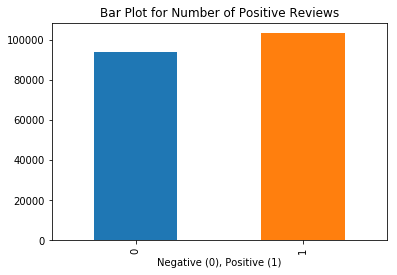

In [20]:
# Plot to check if there is class imbalance
nlpdf["is_positive"].value_counts().sort_values().plot.bar()
plt.title("Bar Plot for Number of Positive Reviews")
plt.xlabel("Negative (0), Positive (1)")
plt.show()

In [21]:
baseline = nlpdf["is_positive"].value_counts()[1] / nlpdf["is_positive"].value_counts().sum()

In [22]:
# Lemmy all the nouns to simple forms
trial1 = []
lemmatizer = WordNetLemmatizer()
for item in nlpdf["Review"]:
    trial1.append(" ".join([lemmatizer.lemmatize(i) for i in item.lower().split()]))

In [23]:
# Replacing Review with lemmatized words
nlpdf["Review"] = trial1
nlpdf["length"] = nlpdf["Review"].apply(lambda x: len(x.split(" ")))
nlpdf

,Review,is_positive,length
0,they have followed through special request com...,1,15
1,great location and very comfortable room room ...,1,22
2,we had the most basic room which wa great valu...,1,16
3,standard room are very comfortable good centra...,1,8
4,very large room hidden courtyard view with bac...,1,24
5,location and room excellent,1,4
6,guest svc manager francesco wa very helpful wi...,1,49
7,room wa great bathroom wa immaculately clean,1,7
8,room and bathroom excellent really comfortable...,1,77
9,staff really friendly bed wa extremely comfy a...,1,35


In [24]:
import scipy.stats as stats

In [25]:
nlpdf[nlpdf["length"] == 4]["Review"]

5                location and room excellent
49                     location of the hotel
77                        room and comfy bed
401                      room size and style
415         brilliant hotel perfect location
444                    great value for money
475                   all staff very helpful
494             staff welcoming and engaging
495            location and overall facility
541         professional and attentive staff
550       bathroom fabulous breakfast lovely
556                      very new and modern
572              great room very comfortable
594                very nice outdoor terrace
602               the staff were outstanding
627           great location excellent staff
640         very central location convenient
656                    location hi spec room
672                    the location wa ideal
678                      loved the bath robe
696                  location room and staff
711                   great place great room
751       

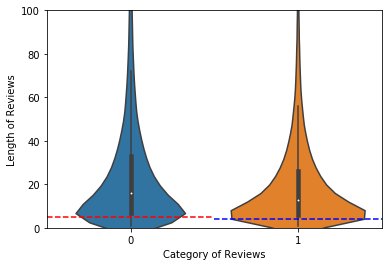

In [26]:
sns.violinplot(x="is_positive", y="length", data=nlpdf)
plt.xlabel("Category of Reviews")
plt.ylabel("Length of Reviews")
plt.axhline(stats.mode(nlpdf[nlpdf["is_positive"] == 0]["length"])[0][0], xmax=0.5, c="r", ls="--")
plt.axhline(stats.mode(nlpdf[nlpdf["is_positive"] == 1]["length"])[0][0], xmin=0.5, c="b", ls="--")
plt.ylim(0, 100)
plt.show()

In [27]:
# Using VADER to analyse
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from sklearn.metrics import roc_curve, auc

In [28]:
X = nndf["Review"]
y = nndf["is_positive"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, stratify=y, random_state=randstate)

In [29]:
# Special function to categorize if Positive or Negative for VADER
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    #print(sentence, snt)
    if snt["neg"] > snt["pos"]:
        tl.append(0)
    elif snt["pos"] > snt["neg"]:
        tl.append(1)
    else:
        if snt["compound"] < 0:
            tl.append(0)
        else:
            tl.append(1)

In [30]:
tl = []
for x in X_test2:
    print_sentiment_scores(x)

In [31]:
tp = 0
fp = 0
tn = 0
fn = 0

for z in range(0, len(y_test2)):
    if (tl[z] == 0) and (y_test2.tolist()[z] == 0): #TN
        tn += 1
    elif (tl[z] == 1) and (y_test2.tolist()[z] == 0): #FP
        fp += 1
    elif (tl[z] == 0) and (y_test2.tolist()[z] == 1): #FN
        fn += 1
    elif (tl[z] == 1) and (y_test2.tolist()[z] == 1): #TP
        tp += 1
print("TP", tp, "TN", tn, "FP", fp, "FN", fn)

TP 25615 TN 10730 FP 12785 FN 224


In [32]:
vd_pred = pd.Series(tl, index=y_test2.index)

In [33]:
vdr_score = roc_auc_score(vd_pred, y_test2)

In [34]:
X = nlpdf["Review"]
y = nlpdf["is_positive"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state=randstate)

In [36]:
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, stop_words=stop, ngram_range=(1, 2), strip_accents = 'unicode')),
    ('tfidf', TfidfTransformer())
])
cvec = pipeline.get_params()["vect"]

In [37]:
X_train1 = pipeline.fit_transform(X_train)
X_test1 = pipeline.transform(X_test)

In [62]:
# Multinomial Naive Bayes
mnd = MultinomialNB()
mnd.fit(X_train1, y_train)
y_pred = mnd.predict(X_test1)
ymnd = mnd.predict_proba(X_test1)
mnb_score = roc_auc_score(y_test, y_pred)
mnb_score

0.9403560203263028

In [56]:
# RandomForest Classifier
rfc = RandomForestClassifier(random_state=randstate, n_jobs=3)
rfc.fit(X_train1, y_train)
y_pred = rfc.predict(X_test1)
yrfc = rfc.predict_proba(X_test1)
rfc_score = roc_auc_score(y_test, y_pred)
rfc_score

0.9230414388324413

In [66]:
# Logistic Regression
lr = LogisticRegression(random_state=randstate)
lr.fit(X_train1, y_train)
y_pred = lr.predict(X_test1)
ylr = lr.predict_proba(X_test1)
lr_score = roc_auc_score(y_test, y_pred)
lr_score

0.9428720139529416

In [41]:
cross_val_score(lr, X_train1, y_train, scoring ='roc_auc', cv=5).mean()

0.9831982451485916

In [42]:
# XGBoost not recommended for NLP

In [71]:
# GridSearch Parameters for Logistic Regression
parameters = {"penalty": ["l1", "l2"],
              "C": np.logspace(-1,1,20)}
gs = GridSearchCV(lr, parameters, verbose=1, cv=3)
gs.fit(X_train1, y_train)
y_pred = gs.best_estimator_.predict(X_test1)
ylrgs = gs.best_estimator_.predict_proba(X_test1)
lrgs_score = roc_auc_score(y_test, y_pred)
lrgs_score

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.3min finished


0.944990169339452

In [44]:
pd.DataFrame({"Tests": ["Baseline", "VADER", "Multinomial", "Random Forest", "Logistic Regression", "Logistic (GridSearch)"],
              "Score": [baseline, vdr_score, mnb_score, rfc_score, lr_score, lrgs_score]})

,Tests,Score
0,Baseline,0.523547
1,VADER,0.823304
2,Multinomial,0.940356
3,Random Forest,0.923041
4,Logistic Regression,0.942872
5,Logistic (GridSearch),0.944990


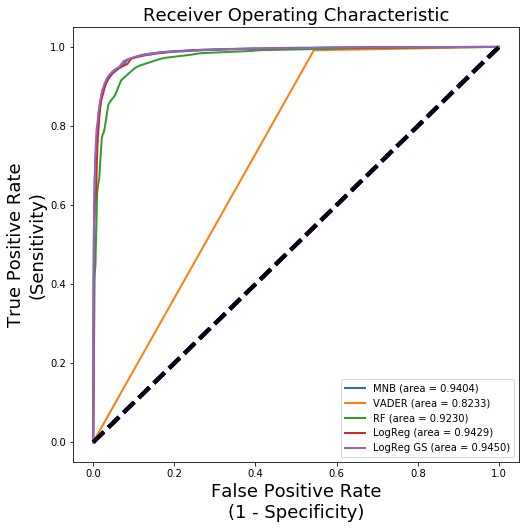

In [45]:
# Plot of a ROC curve for class 1 (has_cancer).
plt.figure(figsize=[8,8])

plt.plot([0, 1], [0, 1], 'c--', linewidth=4)
fpr, tpr, _ = roc_curve(y_test, ymnd[:,1])
plt.plot(fpr, tpr, label='MNB (area = %0.4f)' % mnb_score, linewidth=2)

plt.plot([0, 1], [0, 1], 'g--', linewidth=4)
fpr, tpr, _ = roc_curve(y_test2, vd_pred)
plt.plot(fpr, tpr, label='VADER (area = %0.4f)' % vdr_score, linewidth=2)

plt.plot([0, 1], [0, 1], 'm--', linewidth=4)
fpr, tpr, _ = roc_curve(y_test, yrfc[:,1])
plt.plot(fpr, tpr, label='RF (area = %0.4f)' % rfc_score, linewidth=2)

plt.plot([0, 1], [0, 1], 'r--', linewidth=4)
fpr, tpr, _ = roc_curve(y_test, ylr[:,1])
plt.plot(fpr, tpr, label='LogReg (area = %0.4f)' % lr_score, linewidth=2)

plt.plot([0, 1], [0, 1], 'b--', linewidth=4)
fpr, tpr, _ = roc_curve(y_test, ylrgs[:,1])
plt.plot(fpr, tpr, label='LogReg GS (area = %0.4f)' % lrgs_score, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate\n(1 - Specificity)', fontsize=18)
plt.ylabel('True Positive Rate\n(Sensitivity)', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
confusion_matrix(y_test, y_pred)

array([[44757,  2272],
       [ 3189, 48489]], dtype=int64)

In [81]:
recall = confusion_matrix(y_test, y_pred)[0][0] / (confusion_matrix(y_test, y_pred)[0][0] + confusion_matrix(y_test, y_pred)[0][1])
recall

0.9516893831465691

In [82]:
precision = confusion_matrix(y_test, y_pred)[0][0] / (confusion_matrix(y_test, y_pred)[0][0] + confusion_matrix(y_test, y_pred)[1][0])
precision

0.9334876736328369

In [78]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [79]:
recall_score(y_test, y_pred)

0.9382909555323349

In [83]:
precision_score(y_test, y_pred)

0.9552412285021966

In [84]:
f1_score(y_test, y_pred, average="micro")

0.9446746431357452

In [75]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94     47029
          1       0.96      0.94      0.95     51678

avg / total       0.94      0.94      0.94     98707



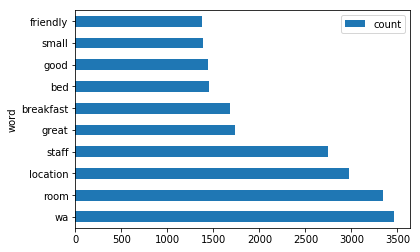

In [50]:
# Get the importance of words in reviews
sum_words = X_test1.sum(axis=0)
cvec = pipeline.get_params()["vect"]
words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
# Importance of words in both reviews
pd.DataFrame(words_freq, columns=["word", "count"]).head(10).set_index("word").plot.barh()

In [51]:
import re

In [52]:
# Output Tester
def detector(text):
    text = re.sub('[^a-z\s]', '', text.lower())
    text = [" ".join([lemmatizer.lemmatize(i.lower()) for i in text.split()])]
    text = pipeline.transform(text)
    print(lr.predict_proba(text)[0])
    if lr.predict(text)[0] > 0:
        print("Positive Comment!")
    else:
        print("Negative Comment!")

In [53]:
detector("the hotel is very far away, cannot wait for the bus.")

[0.96964941 0.03035059]
Negative Comment!


In [54]:
detector("hotel is not very clean, but interesting")

[0.07985833 0.92014167]
Positive Comment!


In [55]:
detector("Easy to reach Covent Garden Soho and City. However the hotel is quite far away from Westminster. Room is clean comfy and nicely designed. Very nice couch good bath.")

[0.17229383 0.82770617]
Positive Comment!


In [ ]:
tttfff = ["the room is small but clean", "joker is fun and happy"]

In [ ]:
for i in tttfff:
    detector(i)

### Trying out Keyword Extractor

In [ ]:
text = ["This breakfast is not good to eat, poor chef"]
text = [" ".join([lemmatizer.lemmatize(i.lower()) for i in text[0].split()])]
tf_idf_vector = pipeline.transform(text)
feature_names = pipeline.get_params()["vect"].get_feature_names()

In [ ]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    
    """
    Extract the feature names and TF-IDF scores of Top n items.
       
    
    """
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [ ]:
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
 
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\n=====Doc=====")
print(text[0])
print("\n===Keywords===")
for k in keywords:
    print(k, keywords[k], end=" | ")

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
features = X_train1
labels = y_train
N = 2
#for Product, category_id in sorted(category_to_id.items()):
for word, idx in sorted(pipeline.get_params()["vect"].vocabulary_.items()):
    features_chi2 = chi2(features, labels == idx)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(pipeline.get_params()["vect"].get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(word))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [ ]:
# Get the importance of words in reviews
sum_words = X_test.sum(axis=0)
cvec = pipeline.get_params()["vect"]
words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
# Importance of words in both reviews
pd.DataFrame(words_freq, columns=["word", "count"]).head(10).set_index("word").plot.barh()

### Recommender System Portion

In [ ]:
# Imports
import gzip
import gensim
from textblob import TextBlob

In [ ]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [ ]:
nlpdf['text_sentiment'] = nlpdf["Review"].apply(sentiment)

In [ ]:
# Positive Reviews
doc = nlpdf.loc[nlpdf[nlpdf["is_positive"] == 1].index, "Review"].apply(lambda x: TextBlob(x.lower()).words)
# Negative Reviews
doc2 = nlpdf.loc[nlpdf[nlpdf["is_positive"] == 0].index, "Review"].apply(lambda x: TextBlob(x.lower()).words)

In [ ]:
model1 = gensim.models.Word2Vec(doc, size=150, window=10, min_count=2, workers=10)
model1.train(doc, total_examples=len(doc), epochs=10)
model2 = gensim.models.Word2Vec(doc2, size=150, window=10, min_count=2, workers=10)
model2.train(doc2, total_examples=len(doc2), epochs=10)

In [ ]:
# Identifying words that are related to w1 under Positive Reviews
w1 = ["bedroom"]
model1.wv.most_similar(positive=w1,topn=15)

In [ ]:
# Identifying words that are related to w1 under Negative Reviews
model2.wv.most_similar(positive=w1,topn=15)

In [ ]:
w2c = dict()
for item in model1.wv.vocab:
    w2c[item]=model1.wv.vocab[item].count

In [ ]:
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
w2cSorted

### Using Hotel Name to identify specific features

In [ ]:
hotelname_var = "Ritz Paris"

In [ ]:
df3 = hoteldf[hoteldf["Hotel_Name"] == hotelname_var][["Negative_Review", "Positive_Review"]]
df3

In [ ]:
negdoc = df3["Negative_Review"].apply(lambda x: TextBlob(x.lower()).words)
posdoc = df3["Positive_Review"].apply(lambda x: TextBlob(x.lower()).words)

In [ ]:
# extracting all keywords
negtext = [[w for w in TextBlob(x.lower()).words if w not in stop] for x in df3["Negative_Review"]]

In [ ]:
model3 = gensim.models.Word2Vec(negdoc, size=100, window=5, min_count=2, workers=10)
model3.train(negtext, total_examples=len(negdoc), epochs=10)

In [ ]:
w1 = ["room"]
model3.wv.most_similar(positive=w1,topn=15)

### Using WordCloud to present comments

In [ ]:
from wordcloud import WordCloud
import re
from matplotlib.ticker import FormatStrFormatter

In [ ]:
def preprocess(x):
    
    '''
    Processes a string to remove any special characters & transforming to lowercase.
    
    Keyword arguments:
    x  --  Text String
    
    '''
    
    x = re.sub('[^a-z\s]', '', x.lower()) # get rid of noise
    x = [w for w in x.split() if w not in set(stop)] # remove stopwords
    return ' '.join(x) # then join the text again

In [ ]:
def freq_words(document):
    sum_words = cvec.transform(document).sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [ ]:
def takeSecond(elem):
    return elem[1]

In [ ]:
# Function to check reviews of specific hotel
def wordcloud_hotel(hotelname_var, displaycount=False):
    
    '''
    Generates two WordClouds for a specific Hotel, consisting of Negative Keywords and Positive Keywords.
    
    Keyword arguments:
    hotelname_var  --  insert Hotel Name as String
    displaycount   -- displays Top 5 Keywords for both Negative and Positive reviews
    
    '''
    
    # limit scope of reviews
    df3 = hoteldf[hoteldf["Hotel_Name"] == hotelname_var][["Negative_Review", "Positive_Review"]]
    negdoc = df3["Negative_Review"].apply(preprocess)
    posdoc = df3["Positive_Review"].apply(preprocess)
    
    # declare our figure 
    plt.subplots(1, 2, figsize=(28,10))
    
    # Negative Words WordCloud
    plt.subplot(121, facecolor='yellow')
    # Generate WordCloud
    wc = WordCloud(width=1600, height=800, random_state=randstate, max_words=2000, background_color="white")
    wc.generate(str(negdoc))
    # add title to the graph
    plt.title("Negative Keywords about {}".format(hotelname_var), fontsize=30, color='black')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=10)

    # Positive Words WordCloud
    plt.subplot(122, facecolor='blue')
    wc = WordCloud(width=1600, height=800, random_state=randstate, max_words=2000, background_color="white")
    # Generate WordCloud
    wc.generate(str(posdoc))
    # Add Title
    plt.title("Positive Keywords about {}".format(hotelname_var), fontsize=30, color='black')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=2)
    plt.show()
    
    if displaycount == True:
        # Generate Keywords Frequency
        print("Top 5 Negative Words:", sorted(freq_words(negdoc), key=takeSecond, reverse=True)[0:5])
        print("Top 5 Positive Words:", sorted(freq_words(posdoc), key=takeSecond, reverse=True)[0:5])

In [ ]:
wordcloud_hotel("Hotel The Serras", True)

In [ ]:
# Function to check reviews of hotel in the state in general
def wordcloud_state(hotelstate_var, displaycount=False):
    
    '''
    Generates two WordClouds for a specific state, consisting of Negative Keywords and Positive Keywords.
    
    Keyword arguments:
    hotelstate_var  -- insert State Name as String
    displaycount    -- displays Top 5 Keywords for both Negative and Positive reviews
    
    '''
    
    # Check if State is present in the data
    if hotelstate_var.capitalize() not in hoteldf["Hotel_State"].unique():
        print("SelectionError: Please select from the following States -", " / ".join(hoteldf["Hotel_State"].unique().tolist()))
    else:
        # limit scope of reviews
        df3 = hoteldf[hoteldf["Hotel_State"] == hotelstate_var.capitalize()][["Negative_Review", "Positive_Review"]]
        negdoc = df3["Negative_Review"].apply(preprocess)
        posdoc = df3["Positive_Review"].apply(preprocess)

        # declare our figure 
        plt.subplots(1, 2, figsize=(25,10))

        # Negative Words WordCloud
        plt.subplot(121, facecolor='yellow')
        # Generate WordCloud
        wc = WordCloud(width=1600, height=800, random_state=randstate, max_words=2000, background_color="white")
        wc.generate(str(negdoc))
        # add title to the graph
        plt.title("Negative Keywords about hotels in {}".format(hotelstate_var.capitalize()), fontsize=30, color='black')
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout(pad=10)

        # Positive Words WordCloud
        plt.subplot(122, facecolor='blue')
        wc = WordCloud(width=1600, height=800, random_state=randstate, max_words=2000, background_color="white")
        # Generate WordCloud
        wc.generate(str(posdoc))
        # Add Title
        plt.title("Positive Keywords about hotels in {}".format(hotelstate_var.capitalize()), fontsize=30, color='black')
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout(pad=4)
        plt.show()
        
        if displaycount == True:
            # Generate Keywords Frequency
            print("Top 5 Negative Words:", sorted(freq_words(negdoc), key=takeSecond, reverse=True)[0:5])
            print("Top 5 Positive Words:", sorted(freq_words(posdoc), key=takeSecond, reverse=True)[0:5])

In [ ]:
wordcloud_state("netherlands", True)

In [ ]:
# Function to check reviews of hotel in the state in general
def wordcloud_origin(origin_var, displaycount=False):
    
    '''
    Generates two WordClouds for reviews from a specific country, consisting of Negative Keywords and Positive Keywords.
    
    Keyword arguments:
    hotelstate_var  -- insert Country Name as String
    displaycount    -- displays Top 5 Keywords for both Negative and Positive reviews
    
    '''
    
    # Check if State is present in the data
    if origin_var.lower() not in hoteldf["Reviewer_Nationality"].apply(preprocess).unique():
        print("SelectionError: Please select from the following States -", " / ".join(hoteldf["Reviewer_Nationality"].apply(preprocess).unique().tolist()))
    else:
        # limit scope of reviews
        df3 = hoteldf[hoteldf["Reviewer_Nationality"].apply(preprocess) == origin_var.lower()][["Negative_Review", "Positive_Review"]]
        negdoc = df3["Negative_Review"].apply(preprocess)
        posdoc = df3["Positive_Review"].apply(preprocess)

        # declare our figure 
        plt.subplots(1, 2, figsize=(25,10))

        # Negative Words WordCloud
        plt.subplot(121, facecolor='yellow')
        # Generate WordCloud
        wc = WordCloud(width=1600, height=800, random_state=randstate, max_words=2000, background_color="white")
        wc.generate(str(negdoc))
        # add title to the graph
        plt.title("Negative Keywords by Guests from {}".format(origin_var.capitalize()), fontsize=30, color='black')
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout(pad=10)

        # Positive Words WordCloud
        plt.subplot(122, facecolor='blue')
        wc = WordCloud(width=1600, height=800, random_state=randstate, max_words=2000, background_color="white")
        # Generate WordCloud
        wc.generate(str(posdoc))
        # Add Title
        plt.title("Positive Keywords by Guests from {}".format(origin_var.capitalize()), fontsize=30, color='black')
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.tight_layout(pad=4)
        plt.show()
        
        if displaycount == True:
            # Generate Keywords Frequency
            print("Top 5 Negative Words:", sorted(freq_words(negdoc), key=takeSecond, reverse=True)[0:5])
            print("Top 5 Positive Words:", sorted(freq_words(posdoc), key=takeSecond, reverse=True)[0:5])

In [ ]:
wordcloud_origin("Taiwan", True)

### Topic Modelling

In [ ]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = pipeline.get_params()["vect"].get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 2

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(pipeline.get_params()["vect"].transform(negdoc))

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, pipeline.get_params()["vect"], number_words)

### Trying NMF

In [ ]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

In [ ]:
nmfsentences = [" ".join(text) for text in negdoc]

In [ ]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000)
x_counts = vectorizer.fit_transform(negdoc)
transformer = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer.fit_transform(x_counts)
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [ ]:
#obtain a NMF model.
model = NMF(n_components=10, init='nndsvd')
model.fit(xtfidf_norm)
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(10):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict)

In [ ]:
get_nmf_topics(model, 10)